# Datenauswertung Kompotoi Team A

### Last modified: Pascal Berger, 17.04.2021

## Read data from sigfox api


Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [1]:
# packages import
import requests
import json
import pandas as pd
import numpy as np

from matplotlib import *


Login to api

In [2]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [3]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,60841d35ab2eff3e2c5b92d9.7510b9b2d4c6b55f2e01a...


get devices data

In [4]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [5]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,1F2504E,60476e95362d421c28ee0058,"B1 (PTH-04E, ex. Türe Beschl.)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '60840d8fab2eff3e2c5a96a8', 'keys': [...",[],[],"{'_id': '60840d8fab2eff3e2c5a96a8', 'keys': [{...",NaN
1,1F25047,60476e95362d421c28ee0058,"B2 (PTH-047, ex. Riegel Besch)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '60841407600a891442a8c8ef', 'keys': [...",[],[],"{'_id': '60841407600a891442a8c8ef', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
2,2203AFA,60476e95362d421c28ee0058,"M1 (POC-AFA, ex. Türe Mag. a)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '6083e2e4ab2eff3e2c57af20', 'keys': [...",[],[],"{'_id': '6083e2e4ab2eff3e2c57af20', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AF9,60476e95362d421c28ee0058,M2 (POC-AF9),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '608417b6600a891442a90897', 'keys': [...",[],[],"{'_id': '608417b6600a891442a90897', 'keys': [{...",NaN
4,2203ACB,60476e95362d421c28ee0058,"M3 (POC-ACB, ex. Riegel Mag.)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '60840d77ab2eff3e2c5a950a', 'keys': [...",[],[],"{'_id': '60840d77ab2eff3e2c5a950a', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."
5,2203AAB,60476e95362d421c28ee0058,"M4 (POC-AAB, ex. Türe Mag. in)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '60827a38600a8914428e4f63', 'keys': [...",[],[],"{'_id': '60827a38600a8914428e4f63', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."


---
## Read sensor data to dataframe

In [6]:
%%time
message_data_combined = pd.DataFrame()

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = "https://www.iofrog.com/api/v2/devices/" + deviceid + "/messages?timestampFrom=1616601600&limit=5000"

  # payload = json.dumps({
  #   "data": [
  #     {
  #       "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
  #       "isAlarm": False,
  #       "isDismissed": False,
  #       "timestamp": 1584093653,
  #       "type": "data_uplink",
  #       "seqNumber": 1,
  #       "keys": [
  #         {
  #           "isCode": False,
  #           "_id": "1111111111111111111111",
  #           "key": "key",
  #           "value": "value",
  #           "keyLocale": "Klíč",
  #           "valueLocale": "Hodnota",
  #           "color": "alarm",
  #           "icon": "icon name (from fontAwesome)"
  #         }
  #       ]
  #     }
  #   ],
  #   "count": 1
  # })
  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 15.6 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter,resetDetail
0,60840d8fab2eff3e2c5a96a8,1619266959,data_bidir,450.0,1F2504E,2021-04-24T12:22:39.958Z,0,orientation_changed,0,0,...,16,1008,1008,1008,-16,0,-32,both,NaN,NaN
1,60840d4b600a891442a843ca,1619266890,data_bidir,449.0,1F2504E,2021-04-24T12:21:31.467Z,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
2,6083eda7ab2eff3e2c585379,1619258791,data_bidir,448.0,1F2504E,2021-04-24T10:06:31.701Z,0,orientation_changed,0,0,...,16,1008,1008,992,-16,0,-32,both,NaN,NaN
3,6083ed63600a891442a5f876,1619258721,data_bidir,447.0,1F2504E,2021-04-24T10:05:23.131Z,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
4,6083bfa1ab2eff3e2c55bf49,1619247008,data_bidir,446.0,1F2504E,2021-04-24T06:50:09.734Z,0,orientation_changed,0,0,...,0,992,1008,992,-16,0,-32,both,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,608015162ec2c31293d6e151,1619006740,data_bidir,126.0,2203AAB,2021-04-21T12:05:42.070Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4996,6080150dc021c13f66d21516,1619006732,data_bidir,125.0,2203AAB,2021-04-21T12:05:33.496Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4997,608015042ec2c31293d6dfb9,1619006724,data_bidir,124.0,2203AAB,2021-04-21T12:05:24.869Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4998,608014fc2ec2c31293d6deec,1619006715,data_bidir,123.0,2203AAB,2021-04-21T12:05:16.253Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0


## Datatype conversions, remove of unused columns

In [7]:
message_data_combined['created'] = pd.to_datetime(message_data_combined['created'])
# not needed later
message_data_combined['timestamp'] = pd.to_datetime(message_data_combined['timestamp'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter,resetDetail
0,60840d8fab2eff3e2c5a96a8,1970-01-01 00:00:01.619266959,data_bidir,450.0,1F2504E,2021-04-24 12:22:39.958000+00:00,0,orientation_changed,0,0,...,16,1008,1008,1008,-16,0,-32,both,NaN,NaN
1,60840d4b600a891442a843ca,1970-01-01 00:00:01.619266890,data_bidir,449.0,1F2504E,2021-04-24 12:21:31.467000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
2,6083eda7ab2eff3e2c585379,1970-01-01 00:00:01.619258791,data_bidir,448.0,1F2504E,2021-04-24 10:06:31.701000+00:00,0,orientation_changed,0,0,...,16,1008,1008,992,-16,0,-32,both,NaN,NaN
3,6083ed63600a891442a5f876,1970-01-01 00:00:01.619258721,data_bidir,447.0,1F2504E,2021-04-24 10:05:23.131000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
4,6083bfa1ab2eff3e2c55bf49,1970-01-01 00:00:01.619247008,data_bidir,446.0,1F2504E,2021-04-24 06:50:09.734000+00:00,0,orientation_changed,0,0,...,0,992,1008,992,-16,0,-32,both,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,608015162ec2c31293d6e151,1970-01-01 00:00:01.619006740,data_bidir,126.0,2203AAB,2021-04-21 12:05:42.070000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4996,6080150dc021c13f66d21516,1970-01-01 00:00:01.619006732,data_bidir,125.0,2203AAB,2021-04-21 12:05:33.496000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4997,608015042ec2c31293d6dfb9,1970-01-01 00:00:01.619006724,data_bidir,124.0,2203AAB,2021-04-21 12:05:24.869000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4998,608014fc2ec2c31293d6deec,1970-01-01 00:00:01.619006715,data_bidir,123.0,2203AAB,2021-04-21 12:05:16.253000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0


### Convert int to float values

In [8]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter,resetDetail
0,60840d8fab2eff3e2c5a96a8,1970-01-01 00:00:01.619266959,data_bidir,450.0,1F2504E,2021-04-24 12:22:39.958000+00:00,0,orientation_changed,0,0,...,16,1008,1008,1008,-16,0,-32,both,NaN,NaN
1,60840d4b600a891442a843ca,1970-01-01 00:00:01.619266890,data_bidir,449.0,1F2504E,2021-04-24 12:21:31.467000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
2,6083eda7ab2eff3e2c585379,1970-01-01 00:00:01.619258791,data_bidir,448.0,1F2504E,2021-04-24 10:06:31.701000+00:00,0,orientation_changed,0,0,...,16,1008,1008,992,-16,0,-32,both,NaN,NaN
3,6083ed63600a891442a5f876,1970-01-01 00:00:01.619258721,data_bidir,447.0,1F2504E,2021-04-24 10:05:23.131000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
4,6083bfa1ab2eff3e2c55bf49,1970-01-01 00:00:01.619247008,data_bidir,446.0,1F2504E,2021-04-24 06:50:09.734000+00:00,0,orientation_changed,0,0,...,0,992,1008,992,-16,0,-32,both,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,608015162ec2c31293d6e151,1970-01-01 00:00:01.619006740,data_bidir,126.0,2203AAB,2021-04-21 12:05:42.070000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4996,6080150dc021c13f66d21516,1970-01-01 00:00:01.619006732,data_bidir,125.0,2203AAB,2021-04-21 12:05:33.496000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4997,608015042ec2c31293d6dfb9,1970-01-01 00:00:01.619006724,data_bidir,124.0,2203AAB,2021-04-21 12:05:24.869000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4998,608014fc2ec2c31293d6deec,1970-01-01 00:00:01.619006715,data_bidir,123.0,2203AAB,2021-04-21 12:05:16.253000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0


### Check and remove unused columns

In [9]:
print(message_data_combined.columns)

Index(['_id', 'timestamp', 'type', 'seqNumber', 'deviceId', 'created', '__v',
       'action', 'battery', 'dl_with_timestamp', 'firmware', 'humidity',
       'hw_config_accelerometer_type', 'hw_config_has_beeper',
       'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led',
       'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi',
       'hw_config_temp_type', 'light_on', 'mode', 'reed_on', 'temperature',
       'version', 'x_fin', 'x_max', 'x_min', 'y_fin', 'y_max', 'y_min',
       'z_fin', 'z_max', 'z_min', '_merge', 'counter', 'resetDetail'],
      dtype='object')


In [10]:
print(message_data_combined['__v'].value_counts())
print(message_data_combined['hw_config_accelerometer_type'].value_counts())
print(message_data_combined['hw_config_has_beeper'].value_counts())
print(message_data_combined['hw_config_has_leakage'].value_counts())
print(message_data_combined['type'].value_counts())
print(message_data_combined['version'].value_counts())
print(message_data_combined['_merge'].value_counts())
print(message_data_combined['dl_with_timestamp'].value_counts())
# humidity is not working, always 0 or false
print(message_data_combined['humidity'].value_counts())
print(message_data_combined['light_on'].value_counts())
print(message_data_combined['reed_on'].value_counts())

print(message_data_combined['firmware'].value_counts())
# check if we need service informations -> not really, drop
message_data_combined.loc[message_data_combined['firmware'] == '1.0', 'firmware':'dl_with_timestamp'].head(1)


0    8133
Name: __v, dtype: int64
0           8124
LIS2DH12       9
Name: hw_config_accelerometer_type, dtype: int64
0        8124
false       9
Name: hw_config_has_beeper, dtype: int64
0        8124
false       9
Name: hw_config_has_leakage, dtype: int64
data_bidir     8114
service_ack      19
Name: type, dtype: int64
0    8124
6       9
Name: version, dtype: int64
both          8133
left_only        0
right_only       0
Name: _merge, dtype: int64
0        388
false      2
Name: dl_with_timestamp, dtype: int64
0     388
56      2
Name: humidity, dtype: int64
0        388
false      2
Name: light_on, dtype: int64
0        388
false      2
Name: reed_on, dtype: int64
0      8124
1.0       9
Name: firmware, dtype: int64


""
372


### 

In [11]:
# test, if we can gather informations from xyz values -> not really
print(message_data_combined['x_min'].value_counts().head())
print(message_data_combined['x_fin'].value_counts().head())
print(message_data_combined['x_max'].value_counts().head())
print(message_data_combined['y_min'].value_counts().head())
print(message_data_combined['y_max'].value_counts().head())
print(message_data_combined['z_min'].value_counts().head())
print(message_data_combined['z_max'].value_counts().head())

0      1282
896     197
912     103
-32      96
16       72
Name: x_min, dtype: int64
0      1282
912     467
896      89
16       88
928      64
Name: x_fin, dtype: int64
0      1282
928     241
912     192
32      108
0        85
Name: x_max, dtype: int64
0      1282
432     361
992     109
416     104
960      87
Name: y_min, dtype: int64
0       1282
448      271
1008     153
976      135
992       85
Name: y_max, dtype: int64
0      1282
16      219
0       174
-16     103
-32      60
Name: z_min, dtype: int64
0     1282
32     191
48     173
0      119
16      94
Name: z_max, dtype: int64


### drop columns

In [12]:
# to check for problems set: errors='raise', otherwise errors='ignore'
message_data_combined.drop(columns=['_id', 'timestamp', 'type', 'seqNumber', '__v', 'firmware', 'hw_config_accelerometer_type', 'hw_config_has_beeper', 'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led', 'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi', 'hw_config_temp_type', 'version', '_merge', 'dl_with_timestamp', 'humidity', 'light_on', 'reed_on'], inplace=True, errors='ignore') 

message_data_combined.drop(columns=['x_min', 'x_fin', 'x_max', 'y_min', 'y_fin', 'y_max', 'z_min', 'z_fin', 'z_max'], inplace=True, errors='ignore')


message_data_combined

,deviceId,created,action,battery,mode,temperature,counter,resetDetail
0,1F2504E,2021-04-24 12:22:39.958000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
1,1F2504E,2021-04-24 12:21:31.467000+00:00,first_move,0,put_me_back,0,NaN,NaN
2,1F2504E,2021-04-24 10:06:31.701000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
3,1F2504E,2021-04-24 10:05:23.131000+00:00,first_move,0,put_me_back,0,NaN,NaN
4,1F2504E,2021-04-24 06:50:09.734000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
...,...,...,...,...,...,...,...,...
4995,2203AAB,2021-04-21 12:05:42.070000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4996,2203AAB,2021-04-21 12:05:33.496000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4997,2203AAB,2021-04-21 12:05:24.869000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4998,2203AAB,2021-04-21 12:05:16.253000+00:00,reed_counter,0,reed_counter,0,1054.0,0


### Sort datframe by sensorId and then by ascending creation timestamp

In [13]:
message_data_combined.sort_values(by=['deviceId', 'created'], inplace = True)
message_data_combined.reset_index(drop=True, inplace=True)
message_data_combined

,deviceId,created,action,battery,mode,temperature,counter,resetDetail
0,1F25047,2021-03-24 16:09:10.882000+00:00,first_move,0,put_me_back,0,NaN,NaN
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
2,1F25047,2021-03-24 16:10:19.624000+00:00,first_move,0,put_me_back,0,NaN,NaN
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
4,1F25047,2021-03-24 16:21:12.376000+00:00,end_of_orientation_alarm,0,put_me_back,0,NaN,NaN
...,...,...,...,...,...,...,...,...
8128,2203AFA,2021-04-23 09:09:01.696000+00:00,heartbeat_2,3,reed_counter,12.5,NaN,NaN
8129,2203AFA,2021-04-23 17:10:54.118000+00:00,heartbeat_2,3,reed_counter,22,NaN,NaN
8130,2203AFA,2021-04-23 17:11:46.213000+00:00,heartbeat_1,3,reed_counter,22,NaN,NaN
8131,2203AFA,2021-04-24 01:14:58.272000+00:00,heartbeat_2,3,reed_counter,8,NaN,NaN


### Fill counter values for non tilt sensors

In [14]:
print(message_data_combined['mode'].value_counts())
print(message_data_combined['action'].value_counts().head(7))
# use action = 'orientation_changed' as counter index as it has the most values
for deviceId in message_data_combined['deviceId'].unique():
    message_data_combined.loc[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId), 'counter'] = (list(message_data_combined[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId)].reset_index().index))

# message_data_combined['counter'] = np.cumsum(message_data_combined['counter'])
message_data_combined[message_data_combined['action'] == 'orientation_changed']

reed_counter    5729
put_me_back     2186
press_me         199
0                 19
Name: mode, dtype: int64
reed_counter                5433
orientation_changed          927
first_move                   876
heartbeat_1                  459
heartbeat_2                  163
end_of_orientation_alarm     107
orientation_alarm            107
Name: action, dtype: int64


,deviceId,created,action,battery,mode,temperature,counter,resetDetail
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,0.0,NaN
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,1.0,NaN
7,1F25047,2021-03-24 16:24:28.338000+00:00,orientation_changed,0,put_me_back,0,2.0,NaN
9,1F25047,2021-03-24 16:41:07.753000+00:00,orientation_changed,0,put_me_back,0,3.0,NaN
11,1F25047,2021-03-24 17:06:50.172000+00:00,orientation_changed,0,put_me_back,0,4.0,NaN
...,...,...,...,...,...,...,...,...
2197,1F2504E,2021-04-23 15:30:58.617000+00:00,orientation_changed,0,put_me_back,0,150.0,NaN
2199,1F2504E,2021-04-23 16:03:51.717000+00:00,orientation_changed,0,put_me_back,0,151.0,NaN
2204,1F2504E,2021-04-24 06:50:09.734000+00:00,orientation_changed,0,put_me_back,0,152.0,NaN
2206,1F2504E,2021-04-24 10:06:31.701000+00:00,orientation_changed,0,put_me_back,0,153.0,NaN


In [15]:
# check if the strucure look ok
for deviceId in message_data_combined['deviceId'].unique():
    print(message_data_combined.loc[message_data_combined['deviceId'] == deviceId, ['deviceId', 'mode', 'created', 'counter']].head())

  deviceId         mode                          created  counter
0  1F25047  put_me_back 2021-03-24 16:09:10.882000+00:00      NaN
1  1F25047  put_me_back 2021-03-24 16:10:03.512000+00:00      0.0
2  1F25047  put_me_back 2021-03-24 16:10:19.624000+00:00      NaN
3  1F25047  put_me_back 2021-03-24 16:11:24.607000+00:00      1.0
4  1F25047  put_me_back 2021-03-24 16:21:12.376000+00:00      NaN
     deviceId      mode                          created  counter
1819  1F2504E  press_me 2021-03-25 08:45:25.628000+00:00      NaN
1820  1F2504E  press_me 2021-03-26 09:18:57.557000+00:00      NaN
1821  1F2504E  press_me 2021-03-27 09:50:29.340000+00:00      NaN
1822  1F2504E  press_me 2021-03-28 10:27:56.461000+00:00      NaN
1823  1F2504E  press_me 2021-03-29 11:02:14.920000+00:00      NaN
     deviceId          mode                          created  counter
2209  2203AAB  reed_counter 2021-04-21 12:05:07.668000+00:00   1054.0
2210  2203AAB  reed_counter 2021-04-21 12:05:16.253000+00:00   1054.

### Pivot data for each sensor

In [16]:
message_data_wide = message_data_combined.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_wide.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
# divide AAB / 2 because door is opened twice per usage
message_data_wide['counter_2203AAB'] = message_data_wide['counter_2203AAB'] / 2

message_data_wide.columns.name = None

message_data_wide

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA
0,2021-03-24 16:09:10.882000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-24 16:09:49.988000+00:00,NaN,NaN,NaN,57.0,NaN,NaN
2,2021-03-24 16:10:03.512000+00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-03-24 16:10:19.624000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24 16:11:24.607000+00:00,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8128,2021-04-24 12:23:21.011000+00:00,770.0,NaN,NaN,NaN,NaN,NaN
8129,2021-04-24 12:30:06.838000+00:00,771.0,NaN,NaN,NaN,NaN,NaN
8130,2021-04-24 12:48:46.156000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
8131,2021-04-24 12:50:15.455000+00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Fill 0 with old values, generate differential counter values

In [17]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_wide = message_data_wide.resample('H').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)

# replace na's with 0's
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].fillna(0)
# forward fill all columns
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].replace(to_replace=0, method='ffill')


for column in message_data_wide.columns[1:]:
    # replace nas and 0's with previous values
    #print(column)
    message_data_wide[f'diff_{column}'] = message_data_wide[column].diff().shift(-1)
    # delete value of first row
    message_data_wide[f'diff_{column}'][0] = 0

# delete cummulative 0's that are left now
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
message_data_wide[cum_columns] = message_data_wide[cum_columns].replace(0, np.nan)

message_data_wide

<ipython-input-17-568d5621bf1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message_data_wide[f'diff_{column}'][0] = 0


,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 16:00:00+00:00,3.0,NaN,NaN,60.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-24 17:00:00+00:00,7.0,NaN,NaN,64.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-24 18:00:00+00:00,11.0,NaN,NaN,66.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-24 19:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-24 20:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2021-04-24 09:00:00+00:00,766.0,152.0,18.5,516.0,42.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0
738,2021-04-24 10:00:00+00:00,769.0,153.0,18.5,516.0,42.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
739,2021-04-24 11:00:00+00:00,769.0,153.0,18.5,516.0,42.0,NaN,2.0,1.0,0.0,1.0,0.0,0.0
740,2021-04-24 12:00:00+00:00,771.0,154.0,18.5,517.0,42.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


## Create Daily data overview

In [18]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_days = message_data_wide.resample('D').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)
message_data_days.reset_index(inplace=True)

message_data_days.head()

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 00:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
1,2021-03-25 00:00:00+00:00,31.0,NaN,NaN,77.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-26 00:00:00+00:00,70.0,NaN,NaN,101.0,3.0,NaN,8.0,0.0,0.0,6.0,2.0,0.0
3,2021-03-27 00:00:00+00:00,79.0,NaN,NaN,104.0,8.0,NaN,3.0,0.0,0.0,1.0,2.0,0.0
4,2021-03-28 00:00:00+00:00,102.0,NaN,NaN,126.0,15.0,NaN,6.0,0.0,0.0,14.0,3.0,0.0


## Visualize commulative data

<AxesSubplot:xlabel='created'>

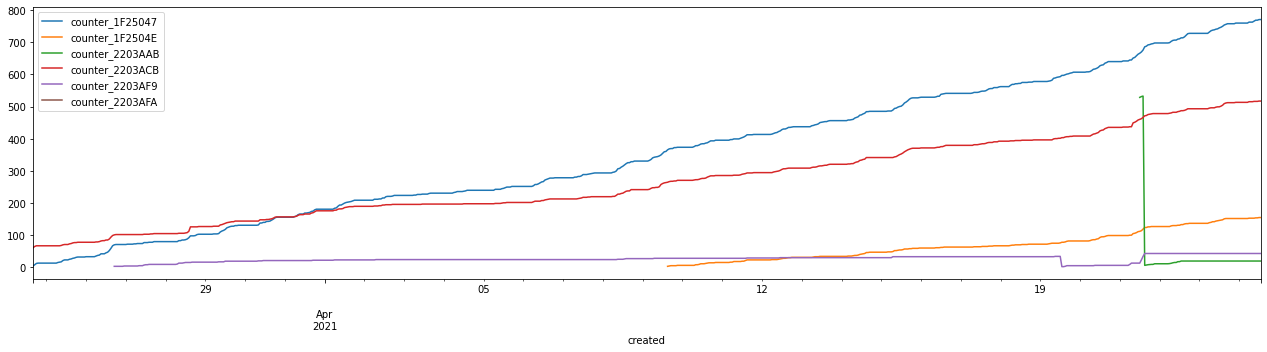

In [19]:
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
cum_columns.append('created')

message_data_wide[cum_columns].plot(x='created', figsize=(22, 5))

## Visualize differential data

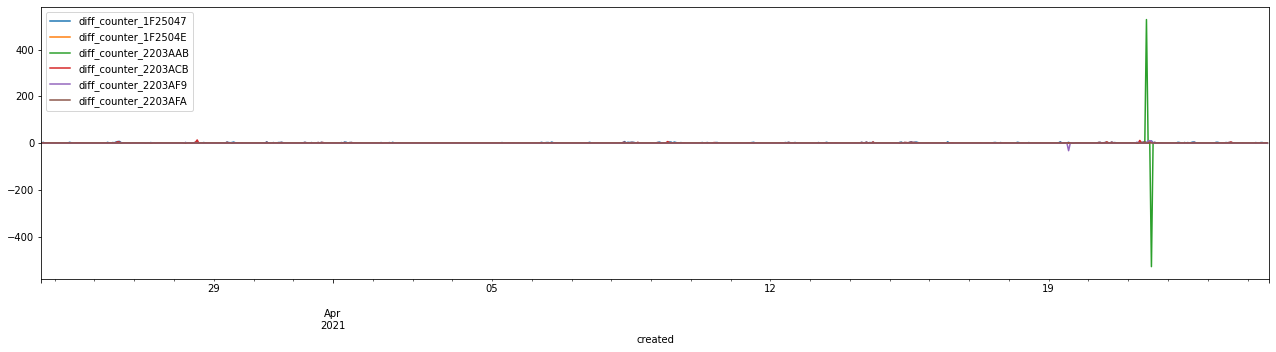

In [20]:
diff_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('diff_')])
diff_columns.append('created')

ax = message_data_wide[diff_columns].plot(kind = 'line', x='created', figsize=(22, 5))
#ax.set_ylim([0, 10])

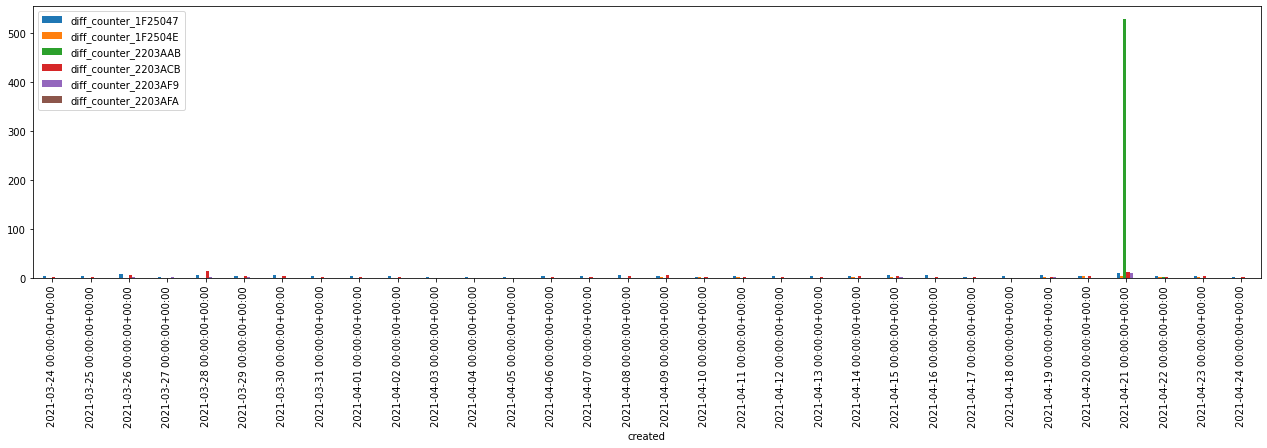

In [21]:
diff_columns = list(message_data_days.columns[message_data_wide.columns.str.startswith('diff_')])
diff_columns.append('created')

ax = message_data_days[diff_columns].plot(kind = 'bar', x='created', figsize=(22, 5))

#ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))


---
## Spielwiese

<AxesSubplot:xlabel='created'>

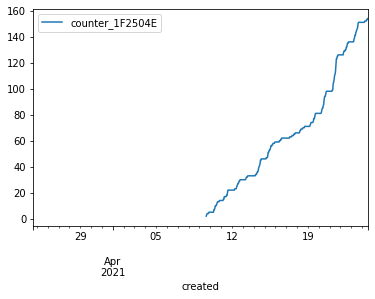

In [22]:
message_data_wide[['created', 'counter_1F2504E']].plot(x='created')

## google drive api (testing still)

In [23]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [24]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [25]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYIQ5c2LLfte50pHuQ79qB74hbjpZ0nlD&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [26]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']


### Jira rest api

In [56]:
import requests
import json
import base64

# Base encode email and api token
cred =  "Basic " + base64.b64encode(b'pascal.berger@students.fhnw.ch:sSrxfdz6DTjt1Sk0C2Wz6071').decode("utf-8") 

# Set header parameters
headers = {
   "Accept": "application/json",
   "Content-Type": "application/json",
   "Authorization" : cred
}
# Enter your project key here
projectKey = "SERVICE"

# Update your site url 
site_url = "https://kompotoi.atlassian.net/rest/api/3"

### Access issues

In [69]:
url = f"{site_url}/search?jql=project={projectKey}"

# Send request and get response
response = requests.request("GET", url, headers=headers)

# Decode Json string to Python
json_data = json.loads(response.text)

# Display issues
# json_data["issues"]

for item in json_data["issues"]:

    print(item["id"] + "\t" + item["key"] + "\t" +
        item["fields"]["issuetype"]["name"] + "\t" +
        item["fields"]["created"]+ "\t" +
        item["fields"]["creator"]["displayName"] + "\t" +
        item["fields"]["status"]["name"] + "\t" +
        item["fields"]["summary"] + "\t" 
        )

    # print(item["fields"]["status"]["name"])

10001	SERVICE-2	Bug	2021-04-24T16:31:02.978+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10000	SERVICE-1	Story	2021-04-24T16:09:04.555+0200	Pascal Berger (s)	Backlog	Test issue	


#### Create issue

In [68]:
url = f"{site_url}/issue"

json_content = \
'''
{
    "fields": {
       "project":
       {
          "key": "''' + projectKey + '''"
       },
       "summary": "REST ye merry gentlemen.",
       "description": {
          "type": "doc",
          "version": 1,
          "content": [
            {
              "type": "paragraph",
              "content": [
                {
                  "type": "text",
                  "text": "description"
                }
              ]
            }
          ]
        },
       "issuetype": {
          "name": "Bug"
       }
   }
}
'''
# json_content

# Send request and get response
response = requests.request("POST", url, headers=headers, data=json_content)

# Decode Json string to Python
json_data = json.loads(response.text)
json_data
# response.textp

{'id': '10001',
 'key': 'SERVICE-2',
 'self': 'https://kompotoi.atlassian.net/rest/api/3/issue/10001'}